[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


#### (1) 데이터의 특징을 파악하시오(EDA).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

In [4]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


[해석]
1. 결측치 존재 여부
    - 데이터를 탐색한 결과, 모든 컬럼에 결측치가 없는 것으로 확인함.
1. 데이터 타입 설명
    - 종속변수는 int형, 나머지 독립변수는 float형으로 구성됨.
    -  Amount는 다른 변수들과 값 차이가 커서 모델 사용 시, scale을 적용할 필요가 있음.
1. 종속변수 특징
    - 0 값이 933개, 1 값이 200개로 데이터 불균형을 의심할 수 있음.
    - 따라서 데이터 불균형 현상을 방지하기 위해 오버 샘플링 및 언더 샘플링을 고려할 수 있음.

#### (2) 상관관계를 시각화하고 전처리가 필요함을 설명하시오.

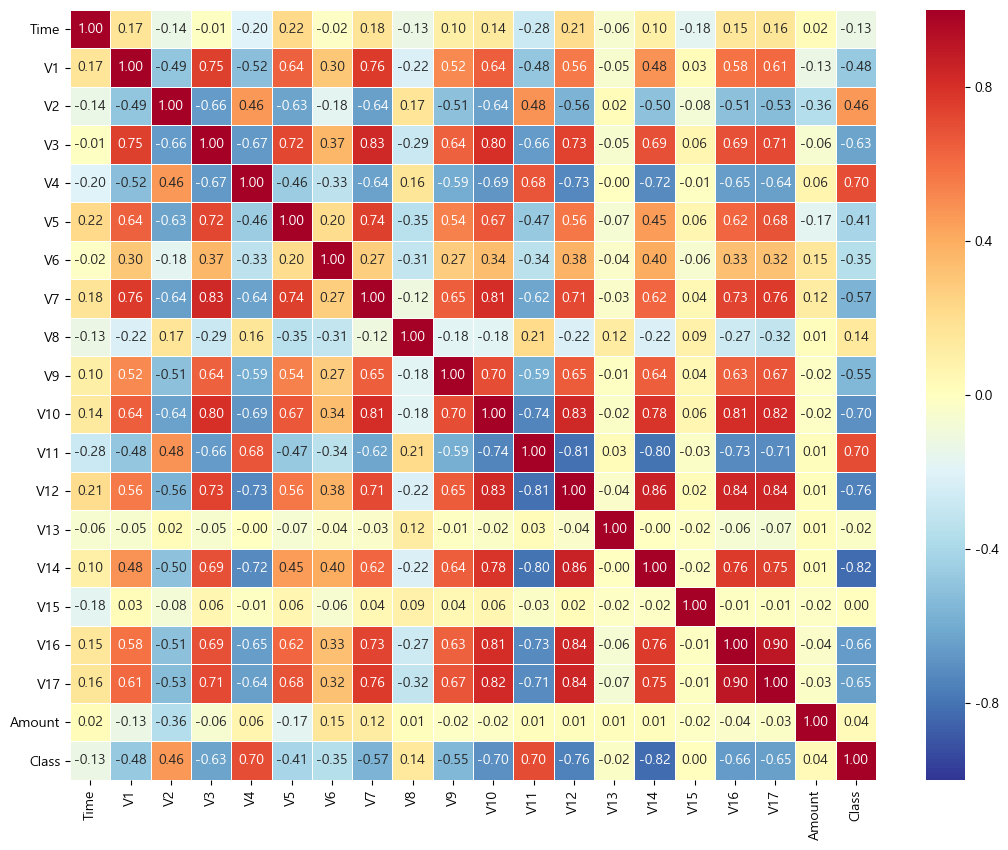

In [6]:
df_corr = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='RdYlBu_r', linewidth=.5)
plt.show()

[해석]
- 독립변수간 상대적으로 강한 상관성을 보이는 경우(V16 ~ V17)가 있으므로 다중공선성을 의심할 수 있음.
- 따라서 차원 축소와 같은 방법으로 다중공선성을 해결할 수 있는 전처리를 고려해야할 수 있음.

### 2. 차원 축소
#### (1) 차원 축소 방법 2가지 이상을 비교하고 한 가지를 선택하시오.
[해석]
1. 요인분석
    - 수집된 많은 변수들이 있을 때, 유사한 항목들끼리 묶어서 처리하는 기법이다. 이 때에는 독립변수와 종속변수의 개념이 없으며, 모든 변수들 간의 관계를 분석함으로써 공통요인을 분석가의 판단으로 묶어서 처리할 수 있다.
1. 주성분 분석
    - 주성분분석이란 데이터에서 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 이루어진 '주성분'이라는 새로운 변수를 만들어 요인을 요약하고 축소하는 기법이다. 변수들의 성격을 알 수 없는 해당 데이터에 어울리는 분석은 PCA이다.

#### (2) 위에서 선택한 방법을 실제로 수행하고, 선택한 이유를 설명하시오.
[해석]
- 해당 데이터의 의미를 정확하게 이해하고 있지 못할 때에는 분석가의 주관적인 견해가 들어가는 요인분석은 사용하기가 어렵다.
- PCA는 데이터 간의 선형 관계만을 가지고 판단하고, 주어진 데이터를 최대한 보존하여 저차원의 데이터를 얻을 수 있으므로 지금과 같은 가명처리 된 변수에 적합한 기법이라 판단하였다.

In [7]:
# Amount 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
scaled_Amount = scaler.fit_transform(df[['Amount']])

In [8]:
df['Scaled_Amount'] = scaled_Amount

In [9]:
# 차원 축소할 데이터만 추출
features = df.columns.drop(['Time', 'Class', 'Amount'])
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'Scaled_Amount'],
      dtype='object')

In [10]:
# 주성분분석
from sklearn.decomposition import PCA

# screee plot으로 주성분 개수 정하기
pca = PCA(n_components=18)
pca_fit = pca.fit(df[features])

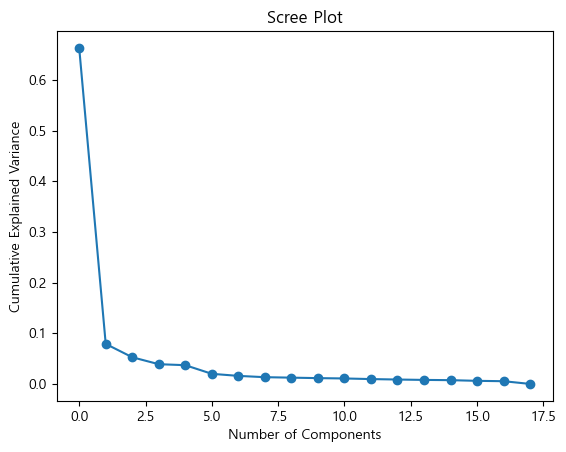

In [11]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [12]:
print('주성분 3개로 축소할 시 분산설명력 :', pca.explained_variance_ratio_[:3].sum()*100)
print('주성분 9개로 축소할 시 분산설명력 :', pca.explained_variance_ratio_[:9].sum()*100)

주성분 3개로 축소할 시 분산설명력 : 79.4794094172914
주성분 9개로 축소할 시 분산설명력 : 93.24159411774042


### 3. 오버 샘플링과 언더 샘플링
#### (1) 오버 샘플링과 언더샘플링의 장단점을 비교하고 선택하시오.
1. 오버 샘플링
    - 장점: 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만틈 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이고, 데이터 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리함.
    - 단점: 랜덤 오버 샘플링은 오버피팅의 우려가 있으며, KNN을 이용한 방법은 오버피팅을 막을 수 있지만 새로운 데이터나 작은 데이터세트에서는 사용하기 어려움.
1. 언더 샘플링
    - 장점: 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터 세트가 가진 레이블의 수 수준으로 감소시키는 기법으로 데이터 불균형 문제를 피할 수 있음.
    - 단점: 전체 데이터 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨릴 수 있음.
    
- 본 분석에서는 데이터세트가 크기 때문에 언더 샘플링을 하면 데이터 손실이 크므로 오버 샘플링을 진행함.

#### (2) 분류분석 구현 및 위에서 선택한 샘플링 기법 중 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정하시오.

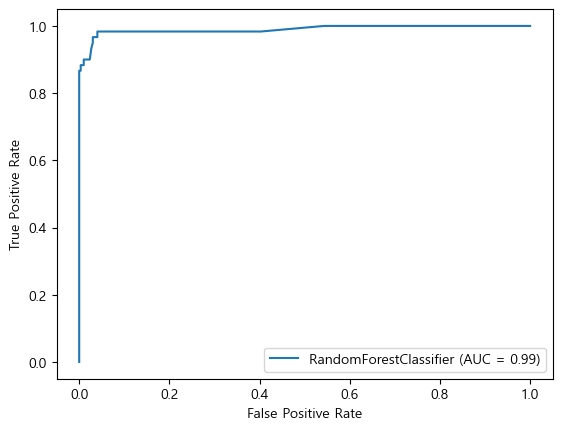

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
X = df[features]
y=df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=321, test_size=.3)
clf = RandomForestClassifier(random_state=321)
clf.fit(X_train, y_train)
plot_roc_curve(clf, X_test, y_test);

[해석]
- AUC값이 0.99으로 굉장이 좋은 성능을 보임. AUC가 높을수록 모델이 사기인 데이터와 정상인 데이터를 잘 분류한다는 것임.
- 하지만 데이터 불균형이 있을 경우 모든 데이터를 정상으로 분류하여도 AUC 값은 높아지게 됨.
- 따라서 오버 또는 언더 샘플링을 하여 모델의 정확도를 살펴야 함.

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


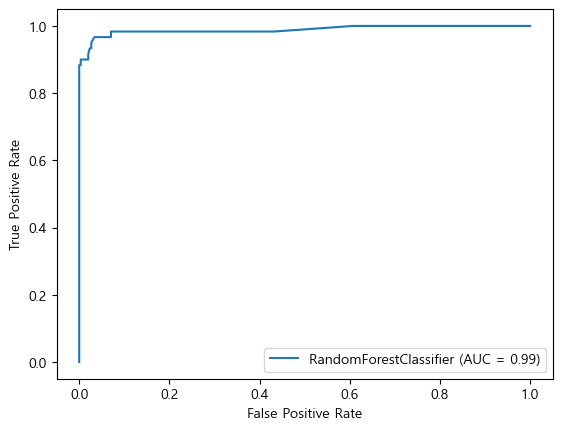

In [19]:
## 1. 랜덤 오버 샘플링
from imblearn.over_sampling import RandomOverSampler

X_train_resampled, y_train_resampled = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)
clf_re = RandomForestClassifier(random_state=0)
clf_re.fit(X_train_resampled, y_train_resampled)
plot_roc_curve(clf_re, X_test, y_test);

[해석]
- 먼저 Class가 소수인 집단에서 랜덤하게 샘플을 복제시키는 랜덤 오버 샘플링 기법을 사용하였을 때에 AUC가 0.99로 나타남.

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


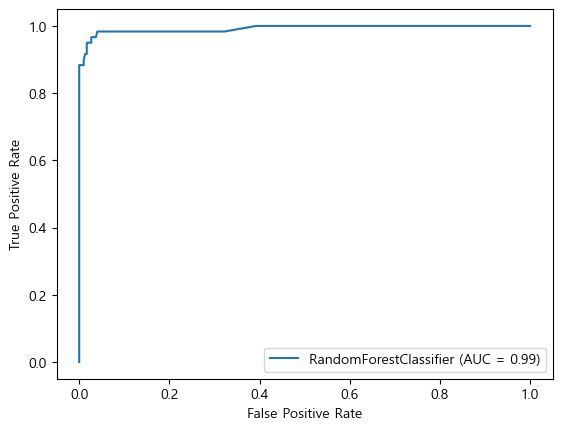

In [22]:
## 1. SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2020)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
clf_sm = RandomForestClassifier(random_state=2020)
clf_sm.fit(X_train_sm, y_train_sm)
plot_roc_curve(clf_sm, X_test, y_test)

[해석]
- SMOTE를 이용하였을 때 AUC값은 0.99로 나타남.

#### (3) 현재까지 전처리한 데이터를 통해 분류 모델 수행 후 결과를 분석하시오.

[해석]
- 오버 샘플링 기법을 진행하지 않은 랜덤포레스트 모델과 오버 샘플링을 진행한 모델의 AUC 값이 서로 동일하므로 예측력을 높이는 오버 샘플링을 적용시킬 필요가 없다고 판단할 수 있음.

### 4. 이상탐지 모델
#### (1) 이상탐지 모델 2가지 이상 서술하고 기술, 장단점을 설명하시오.

1. DBSCAN
    - 클러스터가 더 낮은 밀도의 영역으로 분리된 공간의 밀도가 높은 영역이라는 가정 하에 작동함.
    - 데이터를 클러스터링하기 위해 DBSCAN 알고리즘은 데이터의 고밀도 영역과 저밀도 영역을 분리함.
    - 거리와 군집당 최소 데이터 수를 사용하여 이상 데이터를 특이치로 분류함,
    - 장점: 주변에서 멀어지는 데이터의 특징을 찾아서 Class를 분류하기에 0 혹은 1이 아닌 특이점이라도 별견할 수 있음.
    - 단점: 데이터의 특성을 잘 파악하여 군집 밀도와 최소 데이터 수 등 파라미터를 조정해야 하는 어려움이 있음.
    
2. SVM
    - 데이터를 선형모델로 분류하고자 할때, 선형으로 완전히 분류할 수 없는 데이터의 차원을 올려주어 선으로 분류할 수 있게 커널트릭을 사용하여 데이터를 분류함.
    - SVM 분류 모델은 데이터 공간에 존재하는 경계로 표현되며, 데이터를 분류하는 여러 경계 중에서 가장 큰 마진으로 갖는 경계를 찾음.
    - 장점: 비선형 분류에도 사용되어 오류 데이터에 대한 영향이 거의 없으므로 과적합되는 경우자 적음,
    - 단점: 학습 속도가 느리고, 해석이 어려우며 복잡함.

#### (2) 앞서 전처리한 데이터로 한 가지 이상의 탐지 모델을 구현하고, 3.에서 만든 모델과 비교하시오.

- DBSCAN 이상탐지를 이용하기 위해 적절한 epilson, minPoints 값을 찾아야 함. epilson의 경우 K-distance 그래프를 이용해 찾을 수 있음.
- K 거리 그래프를 그리려면 데이터 세트의 모든 데이터 포인트에 대해 포인트와 가장 가까운 데이터 포인트 사이의 거리가 필요한데, sklearn.neighbor에서 NearestNeighbors를 사용하여 거리를 알 수 있음.

In [27]:
df_sample = df.drop(df[df['Class']==1].index)
df_outlier = df[df['Class']==1].sample(n=60)
df_sample_com = pd.concat([df_sample, df_outlier])
X_sp = df_sample_com[features.drop('Scaled_Amount')]
y_sp = df_sample_com['Class']

In [28]:
from sklearn.neighbors import NearestNeighbors # 주어진 데이터셋에서 최근접 이웃을 찾음.
neigh = NearestNeighbors(n_neighbors=2) # 각 데이터 포인트에 대해 찾을 최근접 이웃의 수를 지정
nbrs = neigh.fit(X_sp) # 각 데이터 포인트의 최근접 이웃과 거리를 구함.
distances, indices = nbrs.kneighbors(X_sp)
distances # 데이터 포인트와 그에 해당하는 최근접 이웃들 사이의 거리 정보가 있음.

array([[ 0.        ,  0.83686913],
       [ 0.        ,  3.73012851],
       [ 0.        ,  1.6144494 ],
       ...,
       [ 0.        ,  8.02514907],
       [ 0.        ,  0.        ],
       [ 0.        , 17.96310397]])

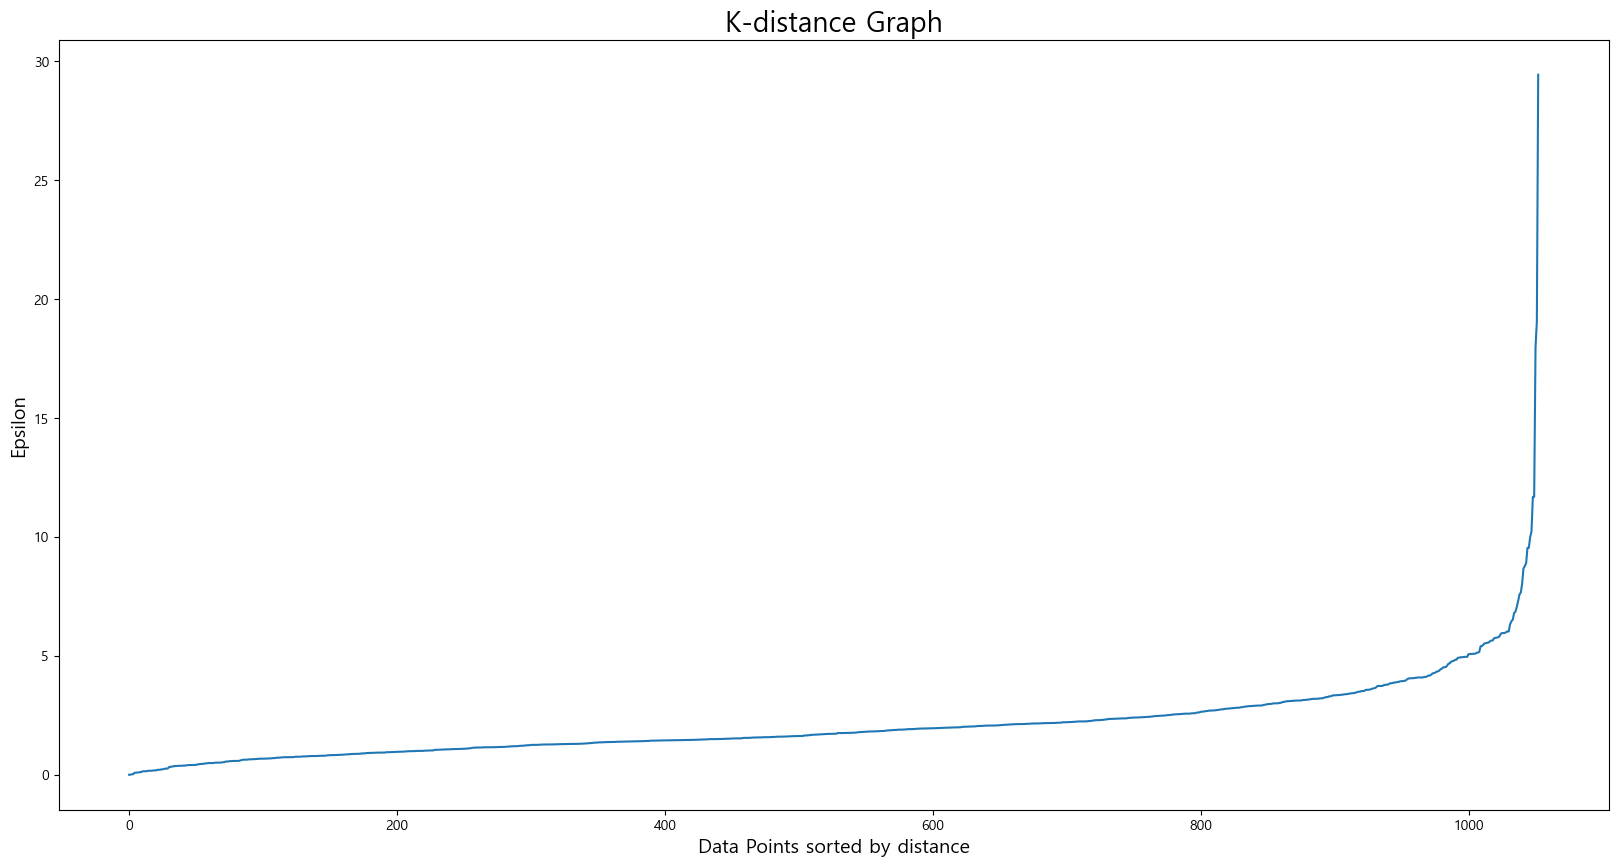

In [35]:
# plotting K-distance graph
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(20, 10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

[해석]
- 엡실론의 최대 값은 K-거리 그래프에서 최대 곡률 지점에 있으며 이 경우 5정도로 지정함.
- minPoints 값은 도메인 지식에 따라다르지만 이번에는 10으로 설정함.

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=6, min_samples=10).fit(X_sp)
labels = db.labels_
data = pd.DataFrame()
data['Class'] = y_sp.copy()
data['labels'] = labels
data.loc[data['labels']==-1, 'Class'].sum()

40

[해석]
- 60개의 이상치 중에서 40개를 분류해냈음.

In [37]:
data.loc[data['labels']==-1]

,Class,labels
55,0,-1
174,0,-1
272,0,-1
512,0,-1
517,0,-1
519,0,-1
594,0,-1
668,0,-1
689,0,-1
737,0,-1


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data.loc[data.labels==-1, 'labels']=1
confusion_matrix(data.Class, data.labels)

array([[973,  20],
       [ 10,  50]], dtype=int64)

In [40]:
accuracy = metrics.accuracy_score(data.Class,data.labels)
print("정확도:", accuracy)

precision = metrics.precision_score(data.Class,data.labels)
print("정밀도:", precision)

recall = metrics.recall_score(data.Class,data.labels)
print("재현율:", recall)

f1 = metrics.f1_score(data.Class,data.labels)
print("f1 점수:", f1)

정확도: 0.9715099715099715
정밀도: 0.7142857142857143
재현율: 0.8333333333333334
f1 점수: 0.7692307692307692


#### (4) 데이터분석가 관점에서 3.에서 만든 모델과 4.에서 만든 모델을 설명하시오.
[해석]
- 4번 모델에서 labels가 -1이면서 Class가 0인 고객은 위험군으로 분류할 수 있음.
- 3번의 랜덤포레스트의 정확도가 휠씬 높아 사기를 당할 확률을 예상할 때에는 랜덤포레스트 모델이 좋아보이지만 0과 1의 분류가 아닌 정상 범주를 벗어나는 여러 케이스가 있을 경우에는 분류해내기 어려움.
- 하지만 DBSCAN과 같은 거리 기반 이상치 탐지는 정상으로 분류되지 않은 이상치를 가지고 위험군으로 관리할 수 있다는 장점이 있음.

## 통계분석
### 1. 2년 전 제품 생산량이 100,000 개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오(반올림하여 소수점 아래 둘째자리까지 표기).

In [2]:
import numpy as np
prod_2y = 100_000
prod_1y = 150_000
prod_0y = 250_000
rt1 = (prod_1y / prod_2y)
rt2 = (prod_0y / prod_1y)
geo_mean = (rt1 * rt2)**(1/2)
print('기하평균:', round(geo_mean*100, 2), '%')

기하평균: 158.11 %


### 2. 12건의 광고시간을 측정한 데이터에서, 평균은 15.5초, 분산은 3.2초였다. 이때 광고시간의 90% 신뢰구간을 구하시오.

In [10]:
import numpy as np
import scipy.stats as stats
print('신뢰구간:', stats.t.interval(alpha=0.90, df=11, loc=15.5, scale=3.2**1/2))

신뢰구간: (12.626584290074128, 18.373415709925872)


### 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 유의수준 0.1하에서 검정하시오(단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있음. 정규성을 만족한다고 가정).
#### (1) 귀무가설과 대립가설을 세우시오.
- 귀무가설:상하류의 생물 다양성 점수에 차이가 없음.
- 대립가설: 상하류의 생물 다양성 점수에 차이가 있음.

In [11]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem7.csv')
df.head()

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


#### (2) 검정통계량과 유의확률을 구하고, 연구가설 채택여부를 검정하시오.

In [17]:
import scipy.stats as stats
stats.ttest_rel(df.up, df.down, alternative='two-sided')

Ttest_relResult(statistic=3.3526056764717995, pvalue=0.028499777234053288)

[해석]
- 유의확률 값이 0.1보다 작으므로 귀무가설을 기각하여 강의 상하류의 생물 다양성 점수에 차이가 있다고 할 수 있음.

### 4. user_counts를 종속변수로 하는 데이터이다.
#### (1) 분위수 회귀분석(Quantile Regression)을 사용하여 회귀계수를 구하시오(반올림하여 소수점 아래 둘째 자리까지 표기).

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem8.csv')
df

,temperature,wind,precipitation,user_counts
0,10.400000,4.600000,0.844944,6368
1,5.666667,4.625000,0.040860,5902
2,4.933333,4.725000,0.008696,6226
3,3.400000,2.675000,0.156989,5829
4,8.900000,3.950000,7.988462,7589
...,...,...,...,...
2092,3.500000,2.100000,0.024096,5430
2093,8.233333,2.000000,16.843820,2125
2094,9.500000,3.666667,11.550575,6008
2095,4.800000,1.200000,0.104651,4929


In [23]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split

X = df[['temperature', 'wind', 'precipitation']]
y = df[['user_counts']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
model = QuantileRegressor()
model.fit(X_train, y_train)

model.coef_

ImportError: cannot import name 'QuantileRegressor' from 'sklearn.linear_model' (C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\linear_model\__init__.py)

### 5. 지하철 호선과 월별 승객 수 간 상관관계가 있는지 확인하시오.
#### (1) 귀무가설과 대립가설을 설정하시오.
[가설]
1. 상호작용효과 검정에 대한 가설
    - 귀무가설: 지하철 호선과 월별 승객 수 간에 상관관계가 없음.
    - 대립가설: 지하철 호선과 월별 승객 수 간에 상관관계가 없음.
    
    
2. 주효과 검정에 대한 가설
    - 귀무가설: 지하철 호선 승객 수 차이는 없음.
    - 대립가설: 지하철 호선 승객 수 차이가 있음.
    
    - 귀무가설: 월별 승객 수 차이는 없음.
    - 대립가설: 월별 승객 수 차이가 있음

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv')
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [44]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'total ~ C(line) * C(month)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, type=3)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(line),2.0,2.147444e+06,1.073722e+06,10362.998525,2.007247e-50
C(month),11.0,3.206533e+04,2.915030e+03,28.134341,2.103496e-14
C(line):C(month),22.0,9.696908e+04,4.407686e+03,42.540665,1.582232e-19
Residual,36.0,3.730000e+03,1.036111e+02,NaN,NaN


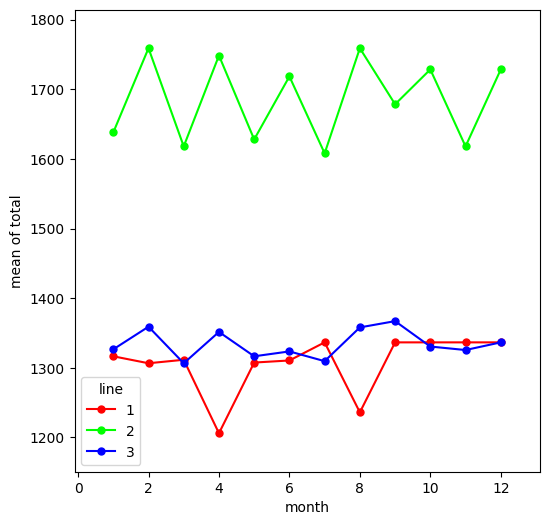

In [48]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# series로 변경
total=df['total']
line=df['line']
month = df['month']
fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(month, line, total, ms=10, ax=ax)

[해석]
- month와 line에 따라 승객 수 그래프가 교차하므로 월별 호선이 승객 수에 서로 영향을 준다고 할 수 있음.